In [1]:
%cd /home/thuongpt/setiment/
# !pip install keras
# !pip install tensorflow

/home/thuongpt/setiment


In [2]:
%ls


data/      file.csv   test.py
data.json  notebook/  word2vec_vi_syllables_100dims.txt


## Load data

In [3]:
import os
import glob
import pandas as pd
from tqdm import tqdm
import numpy as np

In [4]:

# Specify the base directory
base_directory = '/home/thuongpt/setiment/data/Data_not_token/Fold_'

# Create two empty lists for storing the training and testing data
train_data = []
test_data = []

# Loop over each Fold directory
for i in range(1, 6):
    directory = base_directory + str(i)

    # Loop over each txt file in the directory
    for filepath in glob.glob(os.path.join(directory, '*.txt')):
        # Extract the filename from the filepath
        filename = os.path.basename(filepath)

        # Check if the filename contains 'train' or 'test', and ends with a number from 0 to 2
        if 'train_nhan_0' in filename:
            label = 0
            dataset_type = 'train'
        elif 'train_nhan_1' in filename:
            label = 1
            dataset_type = 'train'
        elif 'train_nhan_2' in filename:
            label = 2
            dataset_type = 'train'
        elif 'test_nhan_0' in filename:
            label = 0
            dataset_type = 'test'
        elif 'test_nhan_1' in filename:
            label = 1
            dataset_type = 'test'
        elif 'test_nhan_2' in filename:
            label = 2
            dataset_type = 'test'
        else:
            continue  # Skip files that don't match the conditions

        # Open each file and read its content line by line
        with open(filepath, 'r') as file:
            lines = file.readlines()

        # Loop over each line in the file
        for line in lines:
            # Append the line, label, and dataset type to the appropriate list
            if dataset_type == 'train':
                train_data.append([line.strip(), label])
            else:
                test_data.append([line.strip(), label])

# Convert the lists to DataFrames and save them to CSV files
train_df = pd.DataFrame(train_data, columns=['content', 'label'])
train_df.to_csv('/home/thuongpt/setiment/data/train.csv', index=False)

test_df = pd.DataFrame(test_data, columns=['content', 'label'])
test_df.to_csv('/home/thuongpt/setiment/data/test.csv', index=False)

In [5]:
train_data = pd.read_csv("/home/thuongpt/setiment/data/train.csv")
train_data.head()

,content,label
0,﻿Cặp ok chất liệu khá tốt giá hợp lí... Thí...,2
1,nhìn trong hình mỏng nhưng mà thật thì hơi dày...,2
2,Toi su dung Gel gan 2 tuan nhung chua thay tac...,2
3,Tôi mua giùm nên không biết như thế nào,2
4,Âm thanh rất tốt kết nối ổn định cự ly kết nối...,2


In [6]:
true_count = train_data["label"].value_counts()
print(true_count)

label
1    23952
0    23756
2    22292
Name: count, dtype: int64


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  70000 non-null  object
 1   label    70000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
test_data = pd.read_csv("/home/thuongpt/setiment/data/test.csv")    
test_data.head()

,content,label
0,﻿mình thấy sản phẩm này hợp với da dầu da khô...,1
1,Sản phẩm chất lượng tốt,1
2,Sp tốt giá rẻ.,1
3,sản phẩm chất lượng và giá tốt nói chung tôi ...,1
4,Chất thô hoa văn đẹp,1


In [9]:
true_count = test_data["label"].value_counts()
print(true_count)

label
1    5988
0    5939
2    5573
Name: count, dtype: int64


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  17500 non-null  object
 1   label    17500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 273.6+ KB


In [11]:
data_test = pd.read_excel("/home/thuongpt/setiment/data/Book1.xlsx")
data_test.head()

,title,label
0,"""Huyện Yên Bình biểu dương, tôn vinh điển hình...",0
1,Danh sách những mẫu smartphone Samsung Galaxy ...,2
2,"""Kinh tế suy thoái, doanh thu của Lenovo giảm ...",2
3,"""Tin vui, cuối cùng thì iPhone 15 Series cũng ...",0
4,Nhận ngay 2 tựa game trị giá 424.000 VNĐ đang ...,0


In [37]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               244 non-null    object
 1   label               244 non-null    int64 
 2   preprocessed_title  244 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.8+ KB


## Tiền xử lý

In [12]:
# !pip install underthesea

In [13]:
from underthesea import word_tokenize
import string


In [14]:
with open("/home/thuongpt/TextSummation/data/vietnam/vietnamese_stopswword.txt") as f:
  stop_words = f.readlines()
stop_words = [text.strip() for text in stop_words]


In [15]:
def pre_processing(text):
  # Bước 1: Chuyển hết sang viết thường
  if pd.isnull(text):
        return ""
  text = text.strip()
  text = text.lower()

  # Bước 2: Loại bỏ các dấu câu, ký tự đặc biệt
  text = text.translate(str.maketrans('', '', string.punctuation))

  # # Bước 3: Tách từ và loại bỏ stop words
  tokens = word_tokenize(text)
  tokens = [token for token in tokens if token not in stop_words]

  '''
  Bước 4 (optional): Loại bỏ thông tin ngày tháng (chuyển số thành token đặc biệt <num>)
  do ngày tháng không có ý nghĩa trong việc phân loại tiêu đề báo
  '''
  for i in range(len(tokens)):
    if tokens[i].isnumeric():
      tokens[i] = '<num>' # phải có dấu để đánh dấu là token đặc biệt

  # Bước 5: Nối lại thành câu
  text = ' '.join(tokens)

  return text

In [16]:
for i in tqdm(range(len(train_data))):
    train_data.loc[i, "preprocessed_content"] = pre_processing(train_data.loc[i, "content"])

100%|██████████| 70000/70000 [03:03<00:00, 382.27it/s]


In [17]:
for i in tqdm(range(len(test_data))):
    test_data.loc[i, "preprocessed_content"] = pre_processing(test_data.loc[i, "content"])

100%|██████████| 17500/17500 [00:46<00:00, 376.45it/s]


In [18]:
for i in tqdm(range(len(data_test))):
    data_test.loc[i, "preprocessed_title"] = pre_processing(data_test.loc[i, "title"])

100%|██████████| 244/244 [00:00<00:00, 785.47it/s]


In [19]:
train_data.to_csv("/home/thuongpt/setiment/data/train_data_preprocess.csv", index=False)
test_data.to_csv("/home/thuongpt/setiment/data/test_data_preprocess.csv", index=False)
# data.to_csv("/home/thuongpt/setiment/data/data_preprocess_setiment.csv", index=False)

In [20]:
train = pd.read_csv("/home/thuongpt/setiment/data/train_data_preprocess.csv")
test = pd.read_csv("/home/thuongpt/setiment/data/test_data_preprocess.csv")


In [21]:
train.head()


,content,label,preprocessed_content
0,﻿Cặp ok chất liệu khá tốt giá hợp lí... Thí...,2,﻿ cặp ok chất liệu tốt giá hợp lí thích hợp mạ...
1,nhìn trong hình mỏng nhưng mà thật thì hơi dày...,2,hình mỏng nhưng mà hơi dày đẹp
2,Toi su dung Gel gan 2 tuan nhung chua thay tac...,2,toi su dung gel gan <num> tuan nhung chua thay...
3,Tôi mua giùm nên không biết như thế nào,2,mua giùm như thế nào
4,Âm thanh rất tốt kết nối ổn định cự ly kết nối...,2,âm thanh kết nối ổn định cự ly kết nối pin như...


In [22]:
test.head()

,content,label,preprocessed_content
0,﻿mình thấy sản phẩm này hợp với da dầu da khô...,1,﻿ sản phẩm hợp da dầu da nhờn cảm giác mịn căn...
1,Sản phẩm chất lượng tốt,1,sản phẩm chất lượng
2,Sp tốt giá rẻ.,1,sp giá rẻ
3,sản phẩm chất lượng và giá tốt nói chung tôi ...,1,sản phẩm chất lượng giá nói chung hài lòng
4,Chất thô hoa văn đẹp,1,chất thô hoa văn đẹp


In [23]:
train['preprocessed_content'] = train['preprocessed_content'].fillna('')
test['preprocessed_content'] = test['preprocessed_content'].fillna('')

In [24]:
data_test['preprocessed_title'] = data_test['preprocessed_title'].fillna('')

## Count Vectorization - Bag of Words


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
y_train = np.array(train.label.values)
cv = CountVectorizer(max_features = 100)
X_train = cv.fit_transform(train.preprocessed_content).toarray()
print("X.shape = ",X_train.shape)
print("y.shape = ",y_train.shape)


X.shape =  (70000, 100)
y.shape =  (70000,)


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
y_val = np.array(test.label.values)
cv = CountVectorizer(max_features = 100)
X_val = cv.fit_transform(test.preprocessed_content).toarray()
print("X.shape = ",X_val.shape)
print("y.shape = ",y_val.shape)


X.shape =  (17500, 100)
y.shape =  (17500,)


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
y_test = np.array(data_test.label.values)
cv = CountVectorizer(max_features = 100)
X_test = cv.fit_transform(data_test.preprocessed_title).toarray()
print("X.shape = ",X_test.shape)
print("y.shape = ",y_test.shape)


X.shape =  (244, 100)
y.shape =  (244,)


In [28]:
print(X_test)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Model Machine Learning

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from xgboost import XGBClassifier


def run_model(model_name, x_train, y_train, x_test, y_test):
    mdl = None

    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()

    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0, fit_prior=True)

    elif model_name == 'Support Vector Classifer':
        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=4)

    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    elif model_name == 'XGBoost':
        mdl = XGBClassifier()

    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)

    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores
    precision, recall, f1score, support = precision_recall_fscore_support(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1score}')

    # Return performance parameters as a dictionary
    return {
        'Model': model_name,
        'Test Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1': round(f1score, 2)
    }


## Train với dữ liệu báo

### Mô hình Support Vector Classifer

In [50]:
model1 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
model1.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

In [51]:
y_pred = model1.predict(X_val)
from sklearn.metrics import classification_report
target_names = ['Pos', 'Neu', 'Neg']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Pos       0.91      0.80      0.85      5939
         Neu       0.74      0.93      0.83      5988
         Neg       0.89      0.76      0.82      5573

    accuracy                           0.83     17500
   macro avg       0.85      0.83      0.83     17500
weighted avg       0.85      0.83      0.83     17500



In [49]:
data_test["label"].value_counts()

label
1    150
0     60
2     34
Name: count, dtype: int64

In [52]:
y_hat = model1.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['Pos', 'Neu', 'Neg']
print(classification_report(y_test, y_hat, target_names=target_names))

              precision    recall  f1-score   support

         Pos       0.29      0.47      0.36        60
         Neu       0.74      0.35      0.47       150
         Neg       0.13      0.29      0.18        34

    accuracy                           0.37       244
   macro avg       0.39      0.37      0.34       244
weighted avg       0.55      0.37      0.40       244



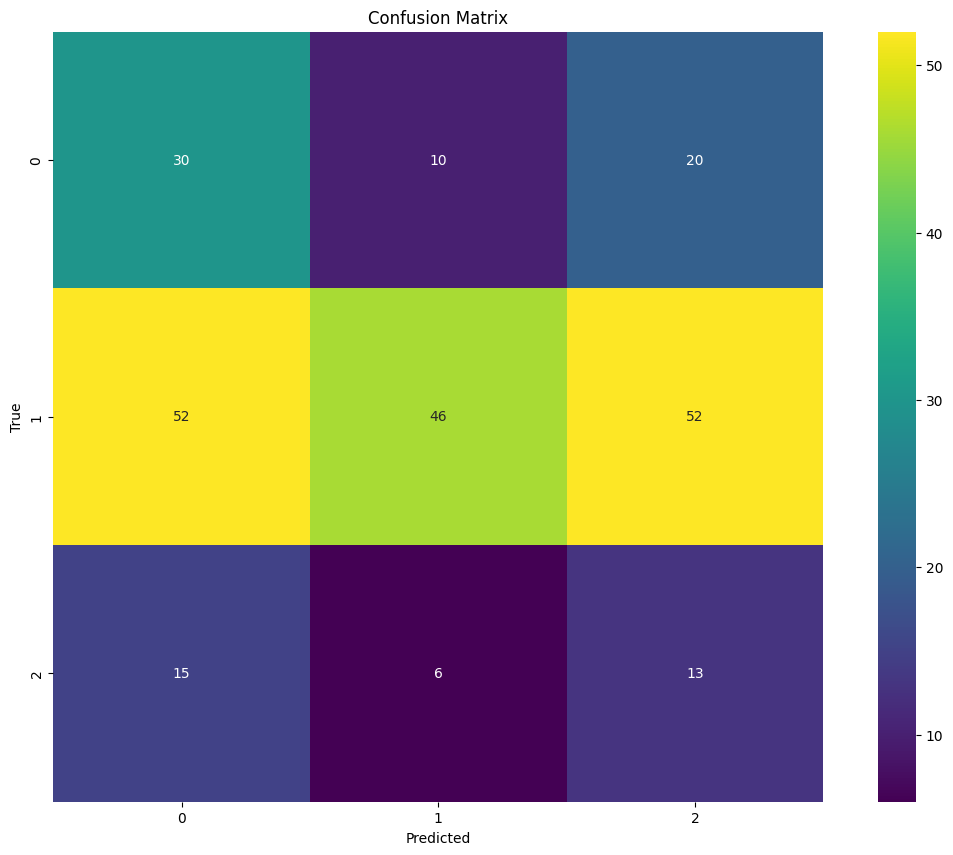

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_hat)

# Display the confusion matrix with different colors for each class
plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', square=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Mô hình XgBoot